In [3]:
#imports
import matplotlib.pyplot as plt
import numpy as np 
import random

In [35]:
#Plotter class

class electric_motor_reqs:

    def __init__(self, speed, acceleration, incline):

        #Environment
        self.speed = speed
        self.acceleration = acceleration
        self.incline = incline*(np.pi/180)

        #INDEPENDENT VARIABLES
        self.RRC = np.linspace(0.02,0.1, 100) #Rolling Resistance Coefficent
        self.SFC = np.linspace(0.1,0.8,100) # Fact checked and Mud is a bitch man.Very very little friction, much less than muddy road(used to be 0.4 as a minimum before)
        self.CG = np.linspace(0.1,0.5,100) # Distance from powered wheels to CG
        self.TE = np.linspace(0.6,0.9,100) # Transmission Efficiency 

        #Constants
        self.r = 0.2 # wheel radius
        self.m = 52.2 # mass of robot
        self.d = 1 # Distance between fron and rear wheels


    #Function to calculate required torque to move forwards
    def torque(self,TE,CG,RRC):

        torque = (self.m*self.r/TE)*(self.acceleration + 9.81*(((self.d-CG)/self.d)*RRC+(CG/self.d)*RRC+np.sin(self.incline)))

        return torque

    #Function to calculate maximum torque available from the soil
    def max_torque(self,CG,SFC):

        torque = self.r*((self.d-CG)/self.d)*self.m*9.81*SFC

        return torque

    #Function to calculate required power to move
    def power(self,TE,CG,RRC):

        power = (self.m*self.speed/TE)*(self.acceleration + 9.81*(((self.d-CG)/self.d)*RRC+(CG/self.d)*RRC+np.sin(self.incline)))

        return power


    def plotter(self,x,torque,max_torque,power,x_label,title):
    
        plt.style.use('classic')
        fig,ax = plt.subplots()
        
        #ax1
        ax.plot(x,torque,linewidth =3, color='blue', label = 'Torque[$Nm$]')
        ax.plot(x, max_torque,linewidth =3, color ='red', label = 'Max_Torque[$Nm$]')
        ax.legend(loc='upper left', bbox_to_anchor=(0.0,1.0), prop={'size': 10})

        ax.set_xlabel(x_label,fontsize=14)
        ax.set_ylabel('Torque',color="Black",fontsize=14)

        #ax2
        ax2=ax.twinx()
        ax2.plot(x,power,linewidth =3, color = 'green', label = 'Power[$W$]')
        ax2.set_ylabel("Power",color="Black",fontsize=14)
        ax2.legend(loc='upper left', bbox_to_anchor=(0.0,0.9), prop={'size': 10})
        #Add legend
        
        plt.suptitle(title)
        plt.savefig('plott.png')

        return plt.gcf()

    def varying_CG(self):

        torque = self.torque(self.TE[50], self.CG, self.RRC[50])
        max_torque = self.max_torque(self.CG,self.SFC[50])
        power = self.power(self.TE[50], self.CG, self.RRC[50])

        self.plotter(self.CG,torque,max_torque,power,'CG distance from front wheels[$m$]','Performance at different CG positions')
    
    def varying_RRC(self):
        torque = self.torque(self.TE[50], self.CG[50], self.RRC)
        max_torque = self.max_torque(self.CG[50],self.SFC[30])*np.ones(100)
        power = self.power(self.TE[50], self.CG[50], self.RRC)

        self.plotter(self.RRC,torque,max_torque,power,'Rolling friction coefficient[-]','Performance for different RRC coefficients')
    
    def varying_TE(self):

        torque = self.torque(self.TE, self.CG[50], self.RRC[50])
        max_torque = self.max_torque(self.CG[50],self.SFC[50])*np.ones(100)
        power = self.power(self.TE, self.CG[50], self.RRC[50])

        self.plotter(self.TE,torque,max_torque,power,'Transmission Efficiency[-]','Performance for different TF efficiencies')

    def varying_SFC(self):

        torque = self.torque(self.TE[50], self.CG[50], self.RRC[50])*np.ones(100)
        max_torque = self.max_torque(self.CG[50],self.SFC)
        power = self.power(self.TE[50], self.CG[50], self.RRC[50])*np.ones(100)

        self.plotter(self.SFC,torque,max_torque,power,'Static friction coefficient[-]','Performance for different SFC coefficients')
    











In [33]:
#Now im gonna do the opposite. Build a class where we give some motor specs, and it returns 


class spec_checker:

SyntaxError: unexpected EOF while parsing (<ipython-input-33-07990a55c352>, line 4)

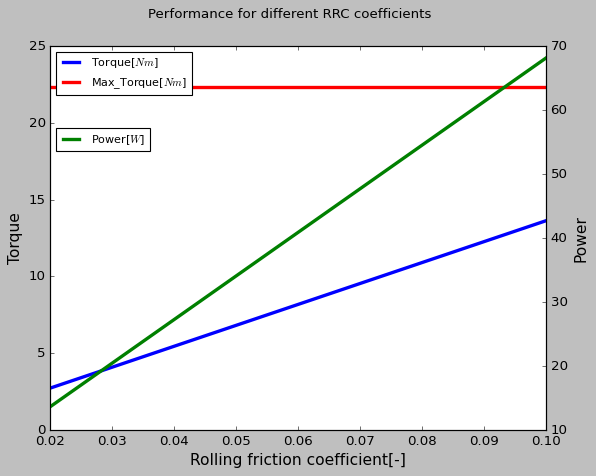

In [36]:
performance_analysis = electric_motor_reqs(1,0,0)
performance_analysis.varying_RRC()

In [126]:
def random_color():

    return ((random.randint(0,255)/255, random.randint(0,255)/255,random.randint(0,255)/255))

In [131]:
def func(a=None):

    return (5+a)

func()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'